In [ ]:
# To import functions required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import LogisticRegression 
from sklearn import linear_model

In [ ]:
#To read the data
data = pd.read_csv('/content/sample_data/Car Data.csv')

In [ ]:
#putting the data in dataframe
car = pd.DataFrame(data)

In [ ]:
#To check the dataframe header and first 5 rows of data
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_brand_name,fuel_n,transmission_n,seller_n,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248.0,74.00,190Nm@ 2000rpm,5.0,Maruti,1,1,1,8
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,Skoda,1,1,1,8
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,3,1,1,16
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,Hyundai,1,1,1,12
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,3,1,1,15


In [ ]:
# find out the number of rows and columns for dataframe
car.shape

(8128, 18)

In [ ]:

# find out the more information about the dataframe
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   name            8128 non-null   object  
 1   year            8128 non-null   int64   
 2   selling_price   8128 non-null   int64   
 3   km_driven       8128 non-null   int64   
 4   fuel            8128 non-null   object  
 5   seller_type     8128 non-null   object  
 6   transmission    8128 non-null   object  
 7   owner           8128 non-null   object  
 8   mileage         7907 non-null   object  
 9   engine          7907 non-null   float64 
 10  max_power       7912 non-null   float64 
 11  torque          7906 non-null   object  
 12  seats           7907 non-null   float64 
 13  car_brand_name  8128 non-null   category
 14  fuel_n          8128 non-null   int64   
 15  transmission_n  8128 non-null   int64   
 16  seller_n        8128 non-null   int64   
 17  car_age       

In [ ]:
# find out the number of missing value
car.isnull().sum()

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           221
engine            221
max_power         216
torque            222
seats             221
car_brand_name      0
fuel_n              0
transmission_n      0
seller_n            0
car_age             0
dtype: int64

In [ ]:
222/8128*100
#result is less than 5%, we will remove the null rows

2.731299212598425

In [ ]:
# alias labencoder
numerics = LabelEncoder()

In [ ]:
#try to find out the car brand from name
car["car_brand_name"] = car["name"].str.extract('([^\s]+)')
car["car_brand_name"] = car["car_brand_name"].astype("category")

In [ ]:
# try to get values from 'engine','mileage' and 'max power', 'fuel' and transmission which is an object

car["engine"] = car["engine"].str.extract('([^\s]+)').astype("float")
car["max_power"] = car["max_power"].str.extract('([^\s]+)')
car["max_power"] = car["max_power"][~(car["max_power"] == "bhp")]
car["max_power"] = car["max_power"].astype("float")
car['fuel_n'] = numerics.fit_transform(car['fuel'])
car['transmission_n'] = numerics.fit_transform(car['transmission'])
car['seller_n'] = numerics.fit_transform(car['seller_type'])

In [ ]:
#create 'car_age' feature from 'year' column

car["car_age"] = (datetime.datetime.now().year) - (car["year"])

In [ ]:
#drop columns which is not useful
car.drop(["name", "year", "torque","mileage"], axis = 1, inplace = True)

In [ ]:
#drop columns which is not useful
car = car.dropna(thresh=len(car.columns)-1)

In [ ]:
#car=car.fillna(car.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
# To view the car dataframe header information after transformation
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   name            8128 non-null   object  
 1   year            8128 non-null   int64   
 2   selling_price   8128 non-null   int64   
 3   km_driven       8128 non-null   int64   
 4   fuel            8128 non-null   object  
 5   seller_type     8128 non-null   object  
 6   transmission    8128 non-null   object  
 7   owner           8128 non-null   object  
 8   mileage         7907 non-null   object  
 9   engine          7907 non-null   float64 
 10  max_power       7912 non-null   float64 
 11  torque          7906 non-null   object  
 12  seats           7907 non-null   float64 
 13  car_brand_name  8128 non-null   category
 14  fuel_n          8128 non-null   int64   
 15  transmission_n  8128 non-null   int64   
 16  seller_n        8128 non-null   int64   
 17  car_age       

In [ ]:
# To view the car dataframe summary
car.describe()

,selling_price,km_driven,engine,max_power,seats,fuel_n,transmission_n,seller_n,car_age
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000
mean,6.497417e+05,6.919256e+04,1458.625016,91.587374,5.416719,1.888074,0.868345,0.889844,8.017832
std,8.135565e+05,5.678976e+04,503.916303,35.744955,0.959588,1.001640,0.338137,0.397159,3.866650
min,2.999900e+04,1.000000e+00,624.000000,32.800000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,2.700000e+05,3.500000e+04,1197.000000,68.050000,5.000000,1.000000,1.000000,1.000000,5.000000
50%,4.500000e+05,6.000000e+04,1248.000000,82.000000,5.000000,1.000000,1.000000,1.000000,7.000000
75%,6.900000e+05,9.575000e+04,1582.000000,102.000000,5.000000,3.000000,1.000000,1.000000,10.000000
max,1.000000e+07,2.360457e+06,3604.000000,400.000000,14.000000,3.000000,1.000000,2.000000,28.000000


In [ ]:
# To create a new feature which is a product of 'engine' and 'max_power'
car['engine * max_power']= car['engine']*car['max_power']

In [ ]:
# To view the car dataframe summary of only catergorical features
car.describe(include = "category")

,car_brand_name
count,7907
unique,31
top,Maruti
freq,2368


In [ ]:
# To view the correlation of features of car dataframe 
car.corr()

,selling_price,km_driven,engine,max_power,seats,fuel_n,transmission_n,seller_n,car_age,engine * max_power
selling_price,1.000000,-0.222196,0.455734,0.749651,0.041358,-0.193116,-0.590279,-0.337035,-0.412268,0.696404
km_driven,-0.222196,1.000000,0.205914,-0.038158,0.227336,-0.270517,0.201207,0.120532,0.428434,0.050699
engine,0.455734,0.205914,1.000000,0.703898,0.610309,-0.485995,-0.283237,-0.091891,-0.018848,0.856411
max_power,0.749651,-0.038158,0.703898,1.000000,0.191911,-0.282271,-0.541865,-0.248179,-0.226410,0.938377
seats,0.041358,0.227336,0.610309,0.191911,1.000000,-0.342048,0.072821,0.052758,0.009144,0.356227
fuel_n,-0.193116,-0.270517,-0.485995,-0.282271,-0.342048,1.000000,-0.034924,0.110176,0.039510,-0.339173
transmission_n,-0.590279,0.201207,-0.283237,-0.541865,0.072821,-0.034924,1.000000,0.230123,0.248972,-0.489727
seller_n,-0.337035,0.120532,-0.091891,-0.248179,0.052758,0.110176,0.230123,1.000000,0.144430,-0.194667
car_age,-0.412268,0.428434,-0.018848,-0.226410,0.009144,0.039510,0.248972,0.144430,1.000000,-0.123331
engine * max_power,0.696404,0.050699,0.856411,0.938377,0.356227,-0.339173,-0.489727,-0.194667,-0.123331,1.000000


In [ ]:
# To view the car dataframe correlation to only selling_price
car.corr()['selling_price']

selling_price         1.000000
km_driven            -0.222196
engine                0.455734
max_power             0.749651
seats                 0.041358
fuel_n               -0.193116
transmission_n       -0.590279
seller_n             -0.337035
car_age              -0.412268
engine * max_power    0.696404
Name: selling_price, dtype: float64

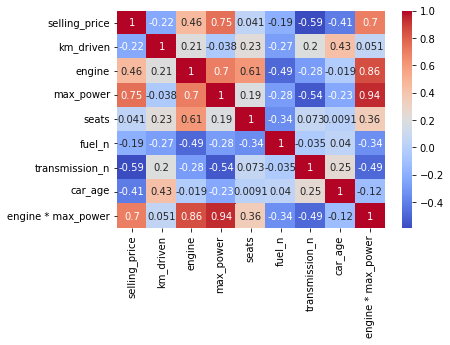

In [ ]:
# To view the car dataframe correlation in heatmap format
sns.heatmap(car.corr(),annot=True,cmap='coolwarm')

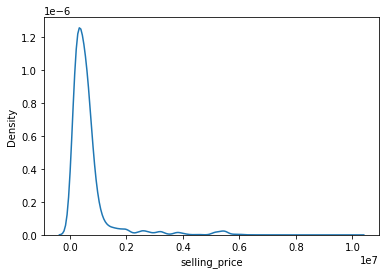

In [ ]:
# To view the kdeplot of 'selling_price'
sns.kdeplot(car['selling_price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


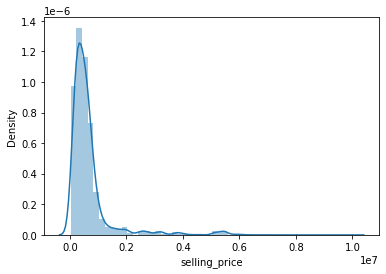

In [ ]:
# To view the distplot of 'selling_price'
sns.distplot(car['selling_price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


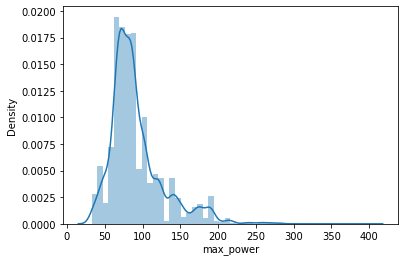

In [ ]:
# To view the distplot of 'max_power'
sns.distplot(car['max_power'])

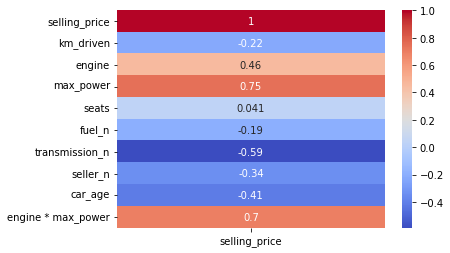

In [ ]:
sns.heatmap(car.corr()[['selling_price']],annot=True,cmap='coolwarm')

In [ ]:
car.shape

(7907, 14)

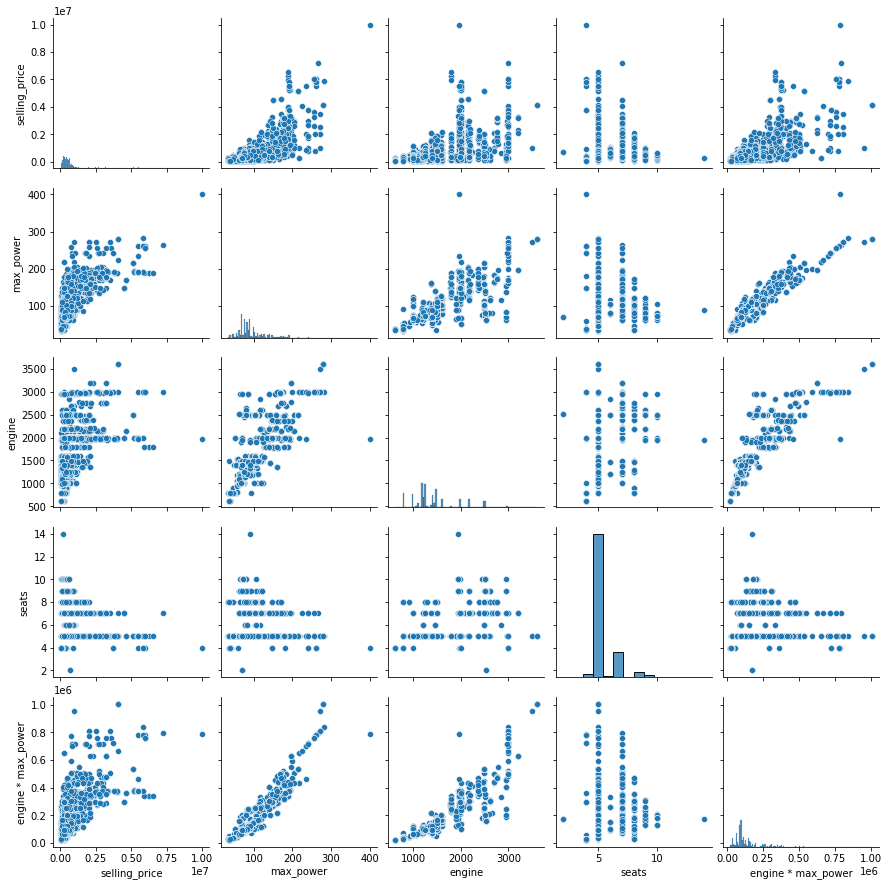

In [ ]:
sns.pairplot(car, vars=['selling_price','max_power','engine','seats','engine * max_power'])

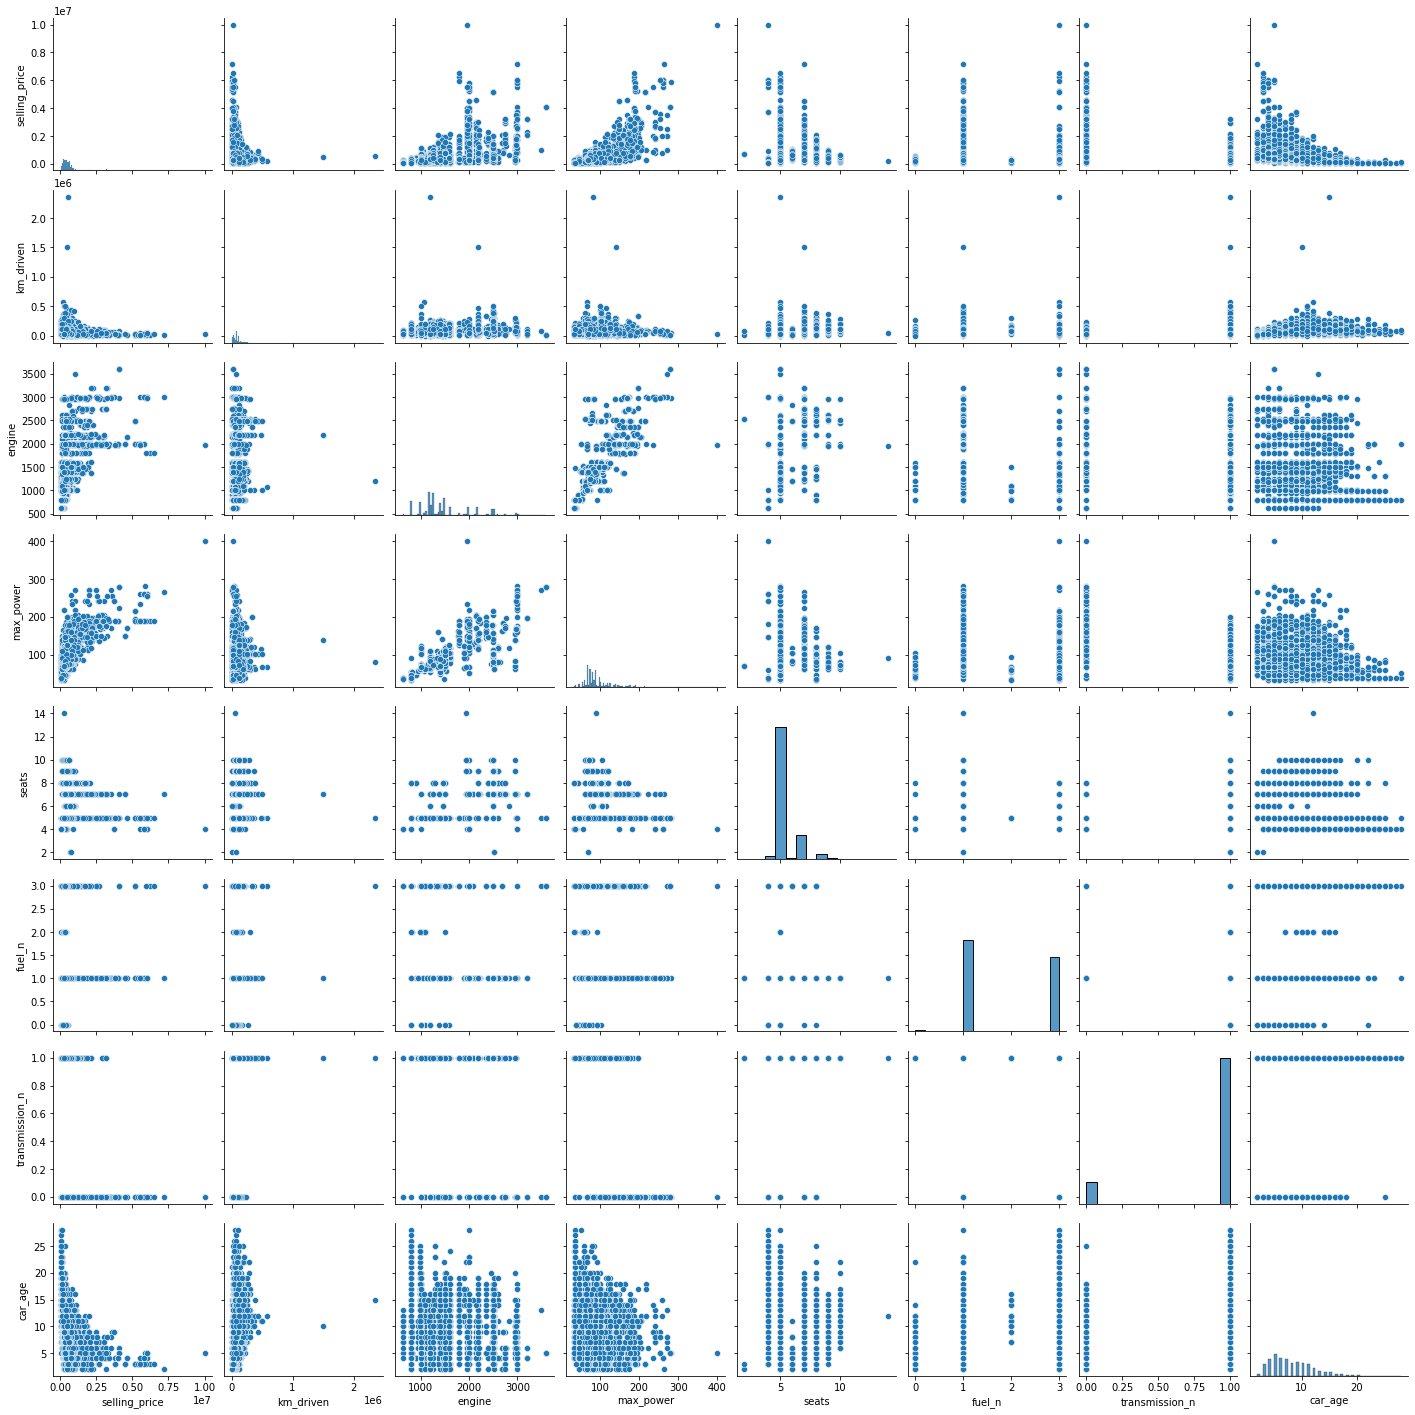

In [ ]:
sns.pairplot(car)

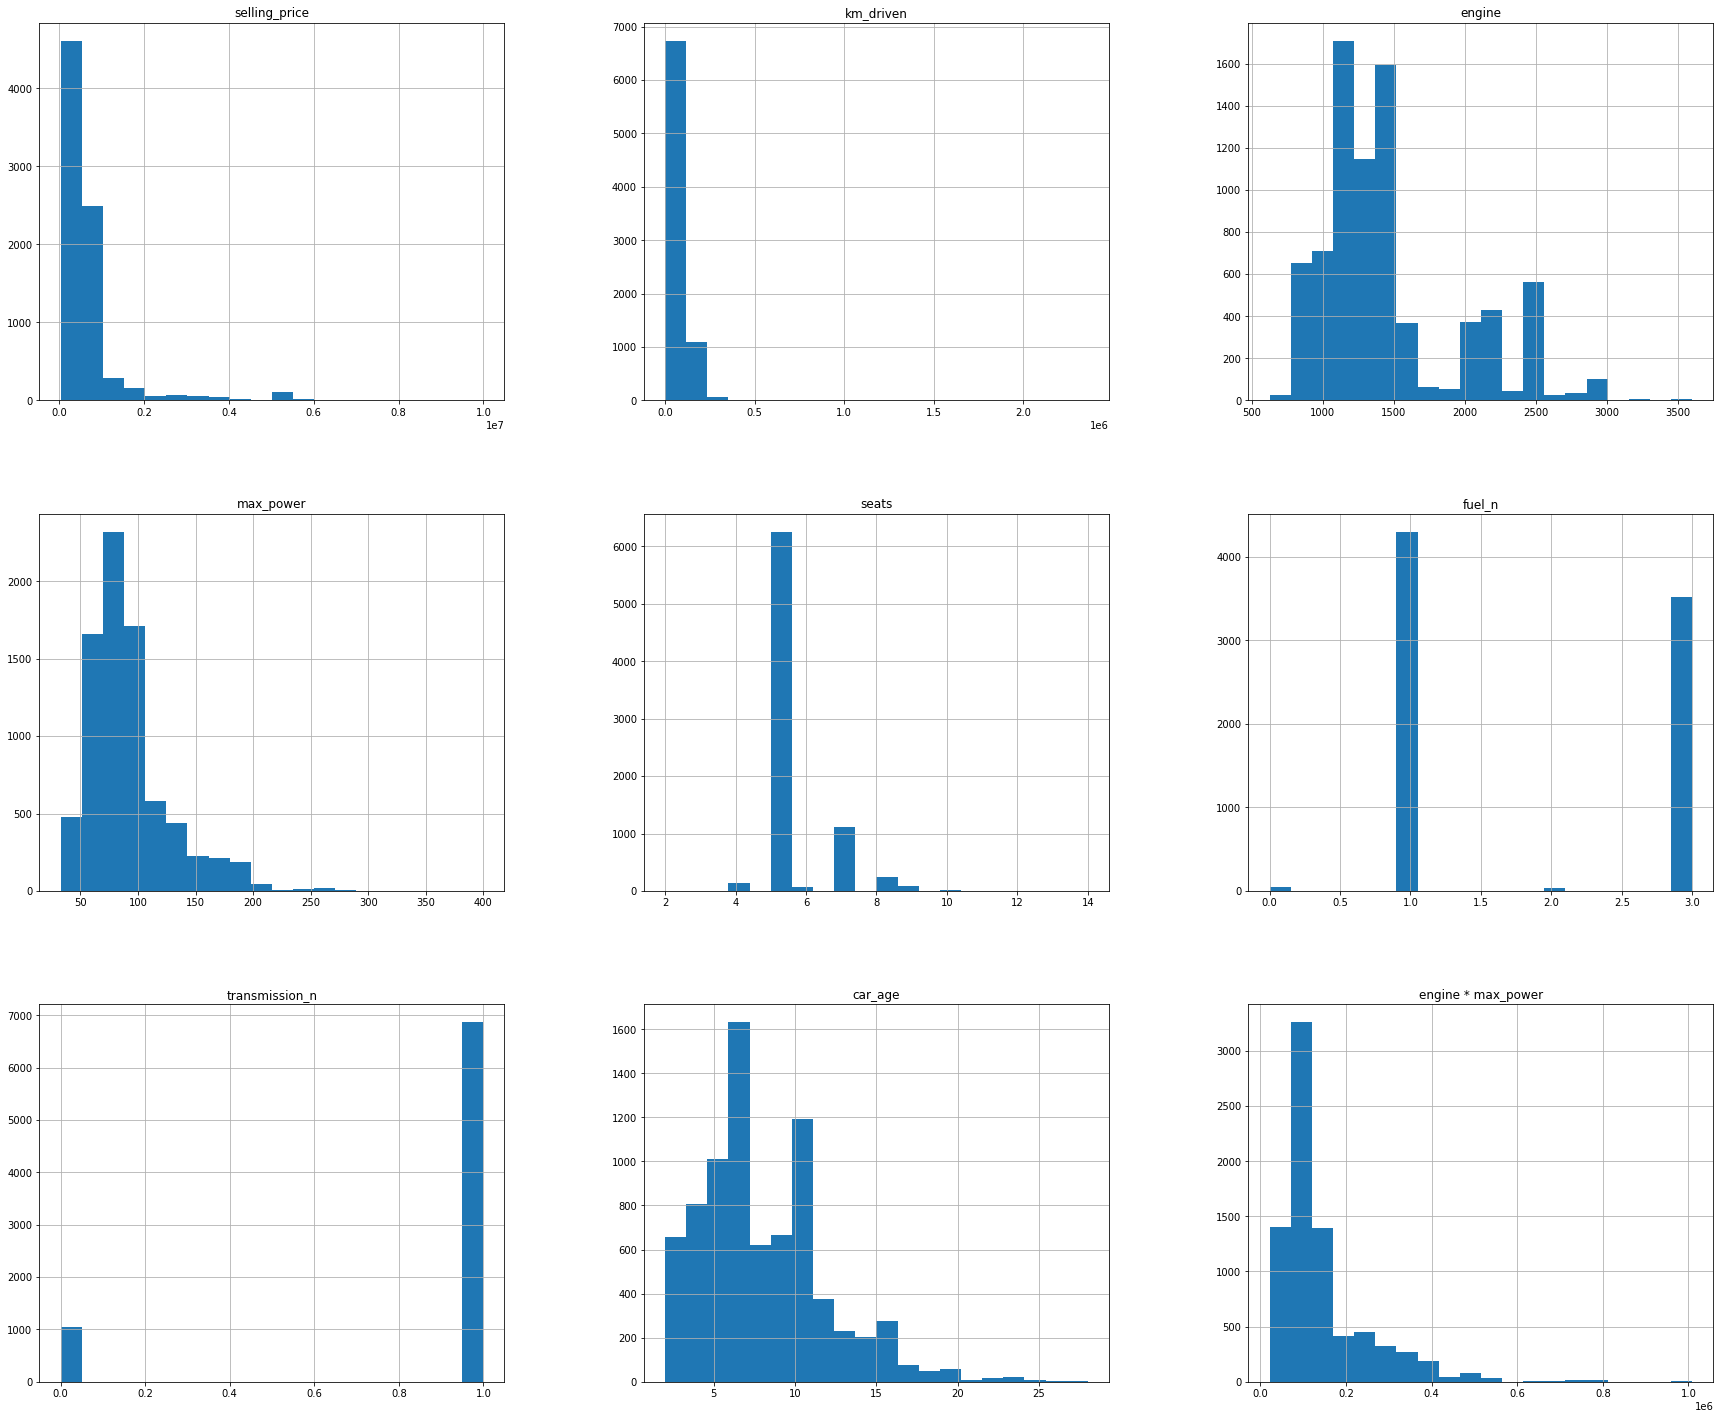

In [ ]:
car.hist(figsize = (30, 25), bins = 20, legend = False)
plt.show()

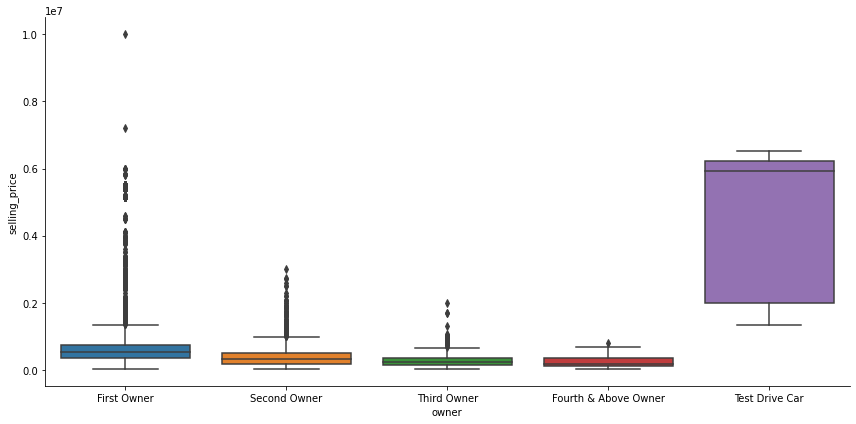

In [ ]:
sns.catplot(data = car, x='owner', y = 'selling_price', kind = "box", height = 6, aspect =2)

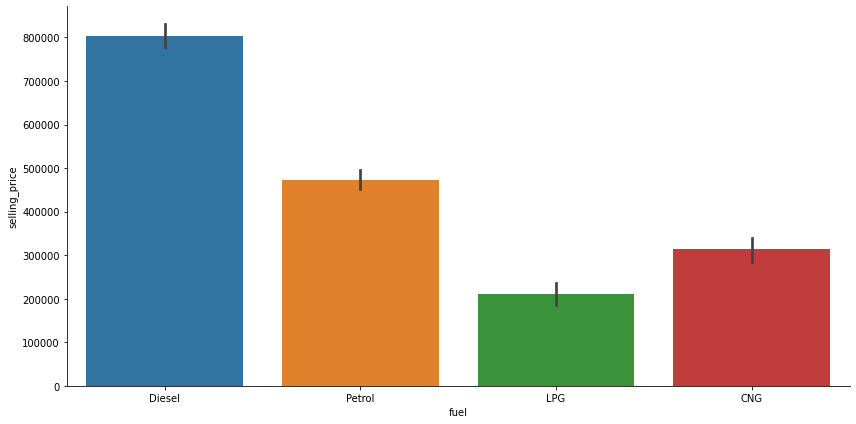

In [ ]:
sns.catplot(data=car, x="fuel", y="selling_price", kind="bar", height = 6, aspect =2)

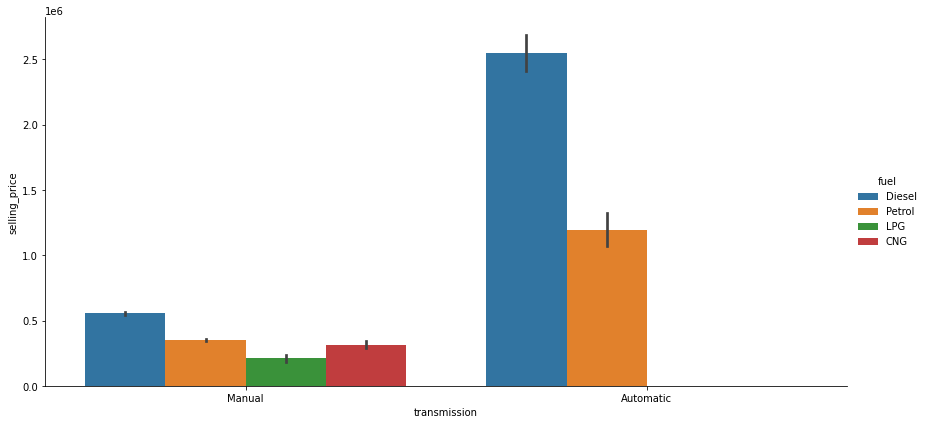

In [ ]:
sns.catplot(data=car, x="transmission", y="selling_price", kind="bar", hue = "fuel", height = 6, aspect =2)

In [ ]:
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(12,8))
residue = (y_test,y_pred)
qqplot(residue,line='45',fit = 'True')

NameError: ignored

<Figure size 864x576 with 0 Axes>

In [ ]:
car.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,car_brand_name,fuel_n,transmission_n,car_age,engine * max_power
0,450000,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0,Maruti,1,1,8,92352.00
1,370000,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0,Skoda,1,1,8,155072.96
2,158000,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0,Honda,3,1,16,116766.00
3,225000,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0,Hyundai,1,1,12,125640.00
4,130000,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0,Maruti,3,1,15,114483.60


In [ ]:
car.shape

(7907, 14)

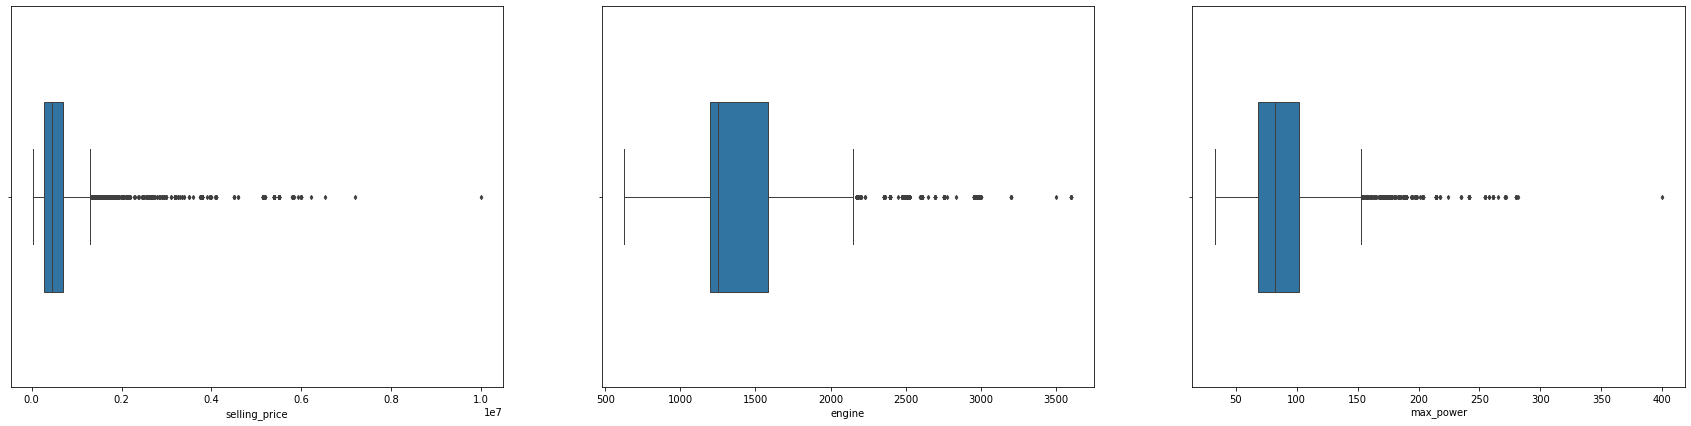

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 7))
sns.boxplot(ax = axes[0], x = "selling_price", data = car, width = 0.5, fliersize = 3, linewidth = 1);
sns.boxplot(ax = axes[1], x = "engine", data = car, width = 0.5, fliersize = 3, linewidth = 1);
sns.boxplot(ax = axes[2], x = "max_power", data = car, width = 0.5, fliersize = 3, linewidth = 1);


In [ ]:
sns.boxplot(ax = axes[2], x = "car_age", data = car, width = 0.5, fliersize = 3, linewidth = 1);

In [ ]:
features =['car_age','km_driven','seats','engine','max_power','transmission_n','fuel_n']

In [ ]:
X = car[features]
y = car['selling_price']

In [ ]:
poly=PolynomialFeatures(include_bias=False)

In [ ]:
X_poly=poly.fit_transform(X)

In [ ]:
lr = LinearRegression()

In [ ]:
X_poly.shape

(7907, 35)

In [ ]:
poly_df = pd.DataFrame(X_poly,columns=poly.get_feature_names(features))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
poly_df

,car_age,km_driven,seats,engine,max_power,transmission_n,fuel_n,car_age^2,car_age km_driven,car_age seats,...,engine^2,engine max_power,engine transmission_n,engine fuel_n,max_power^2,max_power transmission_n,max_power fuel_n,transmission_n^2,transmission_n fuel_n,fuel_n^2
0,8.0,145500.0,5.0,1248.0,74.00,1.0,1.0,64.0,1164000.0,40.0,...,1557504.0,92352.00,1248.0,1248.0,5476.0000,74.00,74.00,1.0,1.0,1.0
1,8.0,120000.0,5.0,1498.0,103.52,1.0,1.0,64.0,960000.0,40.0,...,2244004.0,155072.96,1498.0,1498.0,10716.3904,103.52,103.52,1.0,1.0,1.0
2,16.0,140000.0,5.0,1497.0,78.00,1.0,3.0,256.0,2240000.0,80.0,...,2241009.0,116766.00,1497.0,4491.0,6084.0000,78.00,234.00,1.0,3.0,9.0
3,12.0,127000.0,5.0,1396.0,90.00,1.0,1.0,144.0,1524000.0,60.0,...,1948816.0,125640.00,1396.0,1396.0,8100.0000,90.00,90.00,1.0,1.0,1.0
4,15.0,120000.0,5.0,1298.0,88.20,1.0,3.0,225.0,1800000.0,75.0,...,1684804.0,114483.60,1298.0,3894.0,7779.2400,88.20,264.60,1.0,3.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,9.0,110000.0,5.0,1197.0,82.85,1.0,3.0,81.0,990000.0,45.0,...,1432809.0,99171.45,1197.0,3591.0,6864.1225,82.85,248.55,1.0,3.0,9.0
7903,15.0,119000.0,5.0,1493.0,110.00,1.0,1.0,225.0,1785000.0,75.0,...,2229049.0,164230.00,1493.0,1493.0,12100.0000,110.00,110.00,1.0,1.0,1.0
7904,13.0,120000.0,5.0,1248.0,73.90,1.0,1.0,169.0,1560000.0,65.0,...,1557504.0,92227.20,1248.0,1248.0,5461.2100,73.90,73.90,1.0,1.0,1.0
7905,9.0,25000.0,5.0,1396.0,70.00,1.0,1.0,81.0,225000.0,45.0,...,1948816.0,97720.00,1396.0,1396.0,4900.0000,70.00,70.00,1.0,1.0,1.0


In [ ]:
scores=cross_val_score(lr,X_poly,y)
print(scores)

[0.91462013 0.87729685 0.88462465 0.85527956 0.89192489]


In [ ]:
lr.fit(X_poly,y)
print(lr.score(X_poly,y))
print(cross_val_score(lr,X_poly,y).mean())

0.8965778152957243
0.8847492143710239


In [ ]:
lr.fit(X,y)
print(lr.score(X,y))
print(cross_val_score(lr,X,y).mean())

0.6673200496631071
0.659047325133899


In [ ]:
X.shape

(7907, 7)

In [ ]:
X_poly.shape

(7907, 35)

Hence, from comparison, we can see the baseline score has a significant increase of 66.73% to 88.66%. 


Let's understand correlation of actual predicted Regressioned data (without being trained) yet between 2 highest correlated independent variable and 1 dependent variable.

In [ ]:
poly_df.describe()

,car_age,km_driven,seats,engine,max_power,transmission_n,fuel_n,car_age^2,car_age km_driven,car_age seats,...,engine^2,engine max_power,engine transmission_n,engine fuel_n,max_power^2,max_power transmission_n,max_power fuel_n,transmission_n^2,transmission_n fuel_n,fuel_n^2
count,7907.000000,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7.907000e+03,7907.000000,...,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000
mean,8.017832,6.919256e+04,5.416719,1458.625016,91.587374,0.868345,1.888074,79.234729,6.488406e+05,43.464272,...,2.381486e+06,1.462690e+05,1218.333502,2508.720627,9665.787222,72.980861,162.818684,0.868345,1.627672,4.567978
std,3.866650,5.678976e+04,0.959588,503.916303,35.744955,0.338137,1.001640,80.161450,7.619552e+05,22.335971,...,1.784517e+06,1.089228e+05,644.822771,1221.678588,8931.199490,36.874527,96.763719,0.338137,1.127910,3.976089
min,2.000000,1.000000e+00,2.000000,624.000000,32.800000,0.000000,0.000000,4.000000,1.100000e+01,4.000000,...,3.893760e+05,2.184000e+04,0.000000,0.000000,1075.840000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.500000e+04,5.000000,1197.000000,68.050000,1.000000,1.000000,25.000000,1.800000e+05,25.000000,...,1.432809e+06,9.218910e+04,998.000000,1461.000000,4630.802500,62.100000,88.500000,1.000000,1.000000,1.000000
50%,7.000000,6.000000e+04,5.000000,1248.000000,82.000000,1.000000,1.000000,49.000000,4.740000e+05,40.000000,...,1.557504e+06,1.038128e+05,1248.000000,2388.000000,6724.000000,74.000000,138.900000,1.000000,1.000000,1.000000
75%,10.000000,9.575000e+04,5.000000,1582.000000,102.000000,1.000000,3.000000,100.000000,9.000000e+05,55.000000,...,2.502724e+06,1.650168e+05,1495.000000,3588.000000,10404.000000,89.840000,230.400000,1.000000,3.000000,9.000000
max,28.000000,2.360457e+06,14.000000,3604.000000,400.000000,1.000000,3.000000,784.000000,3.540686e+07,220.000000,...,1.298882e+07,1.009120e+06,2982.000000,10812.000000,160000.000000,198.250000,1200.000000,1.000000,3.000000,9.000000


In [ ]:
# add selling_price column to poly_df

poly_df

,car_age,km_driven,seats,engine,max_power,transmission_n,fuel_n,car_age^2,car_age km_driven,car_age seats,...,engine^2,engine max_power,engine transmission_n,engine fuel_n,max_power^2,max_power transmission_n,max_power fuel_n,transmission_n^2,transmission_n fuel_n,fuel_n^2
0,8.0,145500.0,5.0,1248.0,74.00,1.0,1.0,64.0,1164000.0,40.0,...,1557504.0,92352.00,1248.0,1248.0,5476.0000,74.00,74.00,1.0,1.0,1.0
1,8.0,120000.0,5.0,1498.0,103.52,1.0,1.0,64.0,960000.0,40.0,...,2244004.0,155072.96,1498.0,1498.0,10716.3904,103.52,103.52,1.0,1.0,1.0
2,16.0,140000.0,5.0,1497.0,78.00,1.0,3.0,256.0,2240000.0,80.0,...,2241009.0,116766.00,1497.0,4491.0,6084.0000,78.00,234.00,1.0,3.0,9.0
3,12.0,127000.0,5.0,1396.0,90.00,1.0,1.0,144.0,1524000.0,60.0,...,1948816.0,125640.00,1396.0,1396.0,8100.0000,90.00,90.00,1.0,1.0,1.0
4,15.0,120000.0,5.0,1298.0,88.20,1.0,3.0,225.0,1800000.0,75.0,...,1684804.0,114483.60,1298.0,3894.0,7779.2400,88.20,264.60,1.0,3.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,9.0,110000.0,5.0,1197.0,82.85,1.0,3.0,81.0,990000.0,45.0,...,1432809.0,99171.45,1197.0,3591.0,6864.1225,82.85,248.55,1.0,3.0,9.0
7903,15.0,119000.0,5.0,1493.0,110.00,1.0,1.0,225.0,1785000.0,75.0,...,2229049.0,164230.00,1493.0,1493.0,12100.0000,110.00,110.00,1.0,1.0,1.0
7904,13.0,120000.0,5.0,1248.0,73.90,1.0,1.0,169.0,1560000.0,65.0,...,1557504.0,92227.20,1248.0,1248.0,5461.2100,73.90,73.90,1.0,1.0,1.0
7905,9.0,25000.0,5.0,1396.0,70.00,1.0,1.0,81.0,225000.0,45.0,...,1948816.0,97720.00,1396.0,1396.0,4900.0000,70.00,70.00,1.0,1.0,1.0


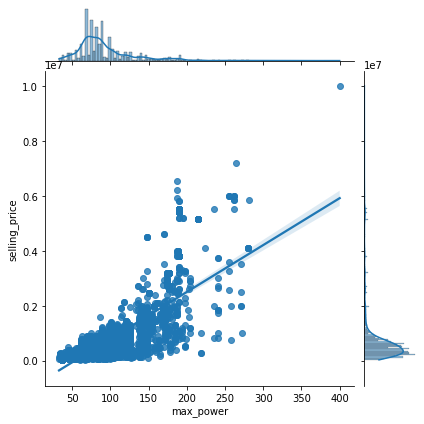

In [ ]:
sns.jointplot(x= 'max_power', y = 'selling_price', data = car, kind = 'reg')

In [ ]:
poly_df.isnull().sum()

car_age                     0
km_driven                   0
seats                       0
engine                      0
max_power                   0
transmission_n              0
fuel_n                      0
car_age^2                   0
car_age km_driven           0
car_age seats               0
car_age engine              0
car_age max_power           0
car_age transmission_n      0
car_age fuel_n              0
km_driven^2                 0
km_driven seats             0
km_driven engine            0
km_driven max_power         0
km_driven transmission_n    0
km_driven fuel_n            0
seats^2                     0
seats engine                0
seats max_power             0
seats transmission_n        0
seats fuel_n                0
engine^2                    0
engine max_power            0
engine transmission_n       0
engine fuel_n               0
max_power^2                 0
max_power transmission_n    0
max_power fuel_n            0
transmission_n^2            0
transmissi

In [ ]:
poly_df = poly_df.dropna(thresh=len(poly_df.columns)-1)

In [ ]:
poly_df =poly_df.fillna(poly_df.mean())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_df, y, test_size=0.3, random_state=42)

In [ ]:
print(f'X_train shape is: {X_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'X_test shape is: {X_test.shape}')
print(f'y_test shape is: {y_test.shape}')

X_train shape is: (5534, 35)
y_train shape is: (5534,)
X_test shape is: (2373, 35)
y_test shape is: (2373,)


In [ ]:
lr_poly = LinearRegression()

In [ ]:
ss = StandardScaler()
Z_train= ss.fit_transform(X_train) 
Z_test= ss.transform(X_test)

In [ ]:
poly_xtrain = Z_train
poly_ytrain = y_train
poly_xtest = Z_test
poly_ytest = y_test

In [ ]:
data_poly = lr_poly.fit(poly_xtrain, poly_ytrain)
data_poly

LinearRegression()

In [ ]:
lr_poly.score(poly_xtrain, poly_ytrain)

0.8953701328914423

In [ ]:
lr_poly.score(poly_xtest, poly_ytest)

0.8845791550440356

TRAIN AND TEST POLYMERISED RMSE

In [ ]:
# Cross validation
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [ ]:
# set up 5 fold cv
from pandas import DataFrame



In [ ]:
k_fold = KFold(5, shuffle = True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
   # Extract data for train and test X and y
    poly_xtrain = poly_df.iloc[train, ]
    poly_ytrain = y.iloc[train, ]
    poly_xtest = poly_df.iloc[test, ]
    poly_ytest = y.iloc[test, ]
    # Fit model with training set
    data_poly = lr_poly.fit(poly_xtrain, poly_ytrain)
    data_poly
    # Make predictions 
    train_p = lr_poly.predict(poly_xtrain)
    test_p = lr_poly.predict(poly_xtest)
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(lr_poly.score(poly_xtrain, poly_ytrain))
    test_scores.append(lr_poly.score(poly_xtest, poly_ytest))
    
    train_rmse.append(mean_squared_error(poly_ytrain/1000000, train_p/1000000, squared=False))
    test_rmse.append(mean_squared_error(poly_ytest/1000000, test_p/1000000, squared=False))


















In [ ]:
# create a dataframe to display r2 and RMSE
polymetric_df = pd.DataFrame({'Train R2': train_scores,
                              'Test R2': test_scores,
                              'Train RMSE': train_rmse,
                              'Test RMSE': test_rmse},
                             index=[i+1 for i in range(5)])

In [ ]:
polymetric_df

,Train R2,Test R2,Train RMSE,Test RMSE
1,0.898014,0.887996,0.263594,0.255392
2,0.895106,0.876603,0.260804,0.297033
3,0.900083,0.877591,0.259784,0.272617
4,0.897203,0.890890,0.262220,0.262878
5,0.894719,0.900066,0.258514,0.277255


In [ ]:
polymetric_df.describe()

,Train R2,Test R2,Train RMSE,Test RMSE
count,5.000000,5.000000,5.000000,5.000000
mean,0.897025,0.886629,0.260983,0.273035
std,0.002200,0.009782,0.001994,0.015877
min,0.894719,0.876603,0.258514,0.255392
25%,0.895106,0.877591,0.259784,0.262878
50%,0.897203,0.887996,0.260804,0.272617
75%,0.898014,0.890890,0.262220,0.277255
max,0.900083,0.900066,0.263594,0.297033


In [ ]:
mean_squared_error(poly_ytrain/1000000, train_p/1000000)

0.06682964202681843

In [ ]:
print(poly_ytrain, train_p)
print(poly_ytrain/1000000, train_p/1000000)

0       450000
1       370000
3       225000
4       130000
5       440000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 6326, dtype: int64 [364899.1034976  543301.42611656 192992.58950689 ... 148743.94107061
 327846.07188126 327846.07188126]
0       0.450
1       0.370
3       0.225
4       0.130
5       0.440
        ...  
8123    0.320
8124    0.135
8125    0.382
8126    0.290
8127    0.290
Name: selling_price, Length: 6326, dtype: float64 [0.3648991  0.54330143 0.19299259 ... 0.14874394 0.32784607 0.32784607]


In [ ]:
k_fold = KFold(5, shuffle = True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
   # Extract data for train and test X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    # Fit model with training set
    data = lr.fit(X_train, y_train)
    data
    # Make predictions 
    train_p = lr.predict(X_train)
    test_p = lr.predict(X_test)
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(lr.score(X_train, y_train))
    test_scores.append(lr.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train/1000000, train_p/1000000, squared=False))
    test_rmse.append(mean_squared_error(y_test/1000000, test_p/1000000, squared=False))

In [ ]:
# create a dataframe to display r2 and RMSE
metric_df = pd.DataFrame({'Train R2': train_scores,
                              'Test R2': test_scores,
                              'Train RMSE': train_rmse,
                              'Test RMSE': test_rmse},
                             index=[i+1 for i in range(5)])

In [ ]:
metric_df

,Train R2,Test R2,Train RMSE,Test RMSE
1,0.670380,0.650983,0.474529,0.448355
2,0.667650,0.664521,0.478139,0.432352
3,0.670836,0.651908,0.467979,0.474687
4,0.667111,0.663741,0.464914,0.489192
5,0.661956,0.680777,0.458965,0.509861


In [ ]:
metric_df.describe()

,Train R2,Test R2,Train RMSE,Test RMSE
count,5.000000,5.000000,5.000000,5.000000
mean,0.667587,0.662386,0.468905,0.470890
std,0.003546,0.012087,0.007623,0.031069
min,0.661956,0.650983,0.458965,0.432352
25%,0.667111,0.651908,0.464914,0.448355
50%,0.667650,0.663741,0.467979,0.474687
75%,0.670380,0.664521,0.474529,0.489192
max,0.670836,0.680777,0.478139,0.509861


In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(poly_xtest, poly_ytest)

LinearRegression()

In [ ]:
Accuracy = lr_poly.score(poly_xtest, poly_ytest)*100

Predict the results

In [ ]:
y_pred=data_poly.predict(poly_xtest)
y_pred

array([211902.63948269,  77351.35181649, 178436.39878925, ...,
       376768.51316795, 344228.21069608, 308353.67024083])

Evaulate the Model

In [ ]:
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 90.01


Plot the Results

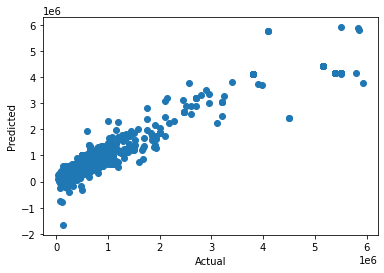

In [ ]:
plt.scatter(poly_ytest,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

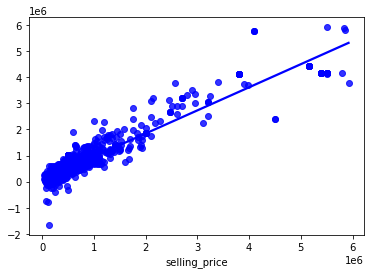

In [ ]:
sns.regplot(x=poly_ytest,y=y_pred,ci=None,color ='blue');

Predicted Values

In [ ]:
# top 2 highest BASELINE correlation 
X_show = car[['engine * max_power','max_power']].values.reshape(-1,2)
y_show = car['selling_price']

In [ ]:
print(X_show.shape)
print(y_show.shape)

(7907, 2)
(7907,)


In [ ]:
car.shape

(7907, 14)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   selling_price       7907 non-null   int64   
 1   km_driven           7907 non-null   int64   
 2   fuel                7907 non-null   object  
 3   seller_type         7907 non-null   object  
 4   transmission        7907 non-null   object  
 5   owner               7907 non-null   object  
 6   engine              7907 non-null   float64 
 7   max_power           7907 non-null   float64 
 8   seats               7907 non-null   float64 
 9   car_brand_name      7907 non-null   category
 10  fuel_n              7907 non-null   int64   
 11  transmission_n      7907 non-null   int64   
 12  car_age             7907 non-null   int64   
 13  engine * max_power  7907 non-null   float64 
dtypes: category(1), float64(4), int64(5), object(4)
memory usage: 1.1+ MB


In [ ]:
car.corr()

,selling_price,km_driven,engine,max_power,seats,fuel_n,transmission_n,car_age,engine * max_power
selling_price,1.000000,-0.222196,0.455734,0.749651,0.041358,-0.193116,-0.590279,-0.412268,0.696404
km_driven,-0.222196,1.000000,0.205914,-0.038158,0.227336,-0.270517,0.201207,0.428434,0.050699
engine,0.455734,0.205914,1.000000,0.703898,0.610309,-0.485995,-0.283237,-0.018848,0.856411
max_power,0.749651,-0.038158,0.703898,1.000000,0.191911,-0.282271,-0.541865,-0.226410,0.938377
seats,0.041358,0.227336,0.610309,0.191911,1.000000,-0.342048,0.072821,0.009144,0.356227
fuel_n,-0.193116,-0.270517,-0.485995,-0.282271,-0.342048,1.000000,-0.034924,0.039510,-0.339173
transmission_n,-0.590279,0.201207,-0.283237,-0.541865,0.072821,-0.034924,1.000000,0.248972,-0.489727
car_age,-0.412268,0.428434,-0.018848,-0.226410,0.009144,0.039510,0.248972,1.000000,-0.123331
engine * max_power,0.696404,0.050699,0.856411,0.938377,0.356227,-0.339173,-0.489727,-0.123331,1.000000


In [ ]:
car.isnull().sum()

selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
engine                0
max_power             0
seats                 0
car_brand_name        0
fuel_n                0
transmission_n        0
car_age               0
engine * max_power    0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_show, y_show, test_size=0.3, random_state=42)

In [ ]:
lr_basic = LinearRegression()

In [ ]:
data_basic = lr_basic.fit(X_train, y_train)
data_basic

LinearRegression()

In [ ]:
lr_basic.score(X_train, y_train)

0.5591978703533118

In [ ]:
Y= lr_basic.score(X_test, y_test)
Y

0.5676538672241818

below is based 2 highest BASELINE corelation from cars: 'engine' and ' max_power'.

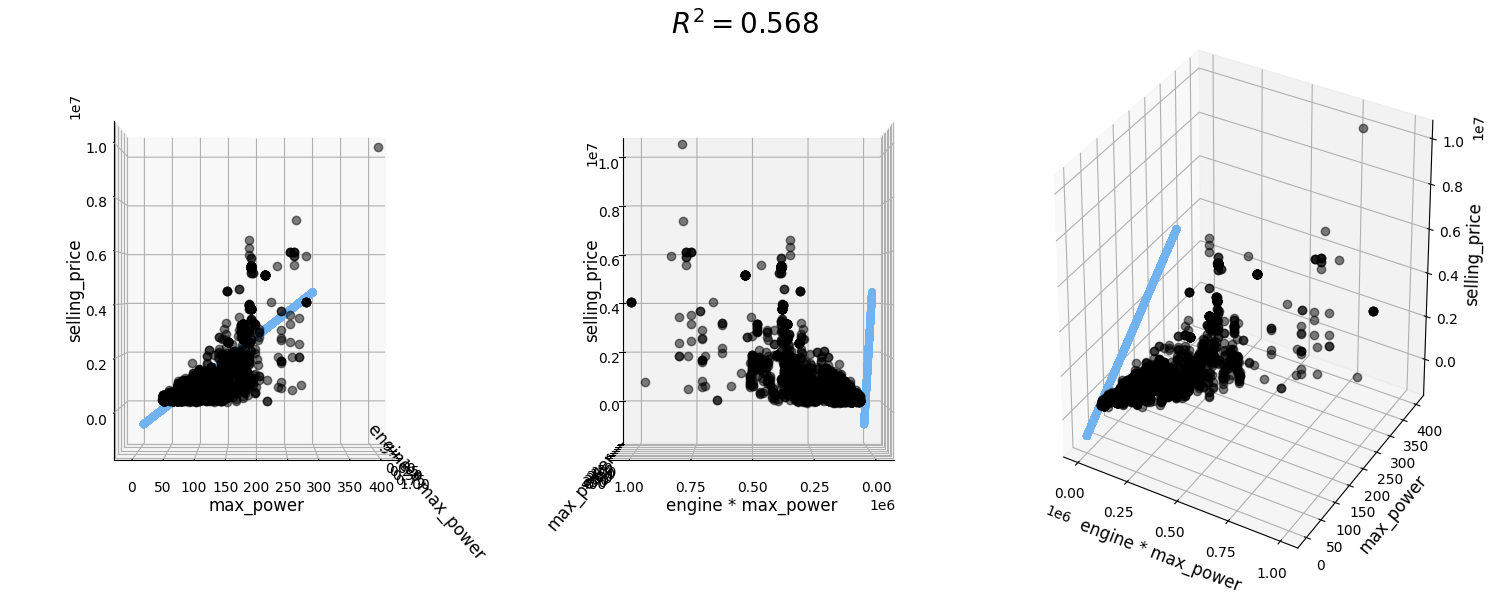

In [ ]:
x1 = X_show[:, 0]
x2 = X_show[:, 1]
z = car['selling_price']
x_tr = np.linspace(0, 1000, 100)   # range of engine*max_power, number of datapoints 
y_tr = np.linspace(0, 300, 100)  # range of max_power, number of datapoints
xx_tr, yy_tr = np.meshgrid(x_tr, y_tr)
model_viz = np.array([xx_tr.flatten(), yy_tr.flatten()]).T
y_pred = lr_basic.predict(model_viz)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x1, x2, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_tr.flatten(), yy_tr.flatten(), y_pred, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('engine * max_power', fontsize=12)
    ax.set_ylabel('max_power', fontsize=12)
    ax.set_zlabel('selling_price', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=0, azim=0)
ax2.view_init(elev=0, azim=90)

fig.suptitle('$R^2 = %.3f$' % Y, fontsize=20)

fig.tight_layout()

In [ ]:
car.describe()

,selling_price,km_driven,engine,max_power,seats,fuel_n,transmission_n,car_age
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000
mean,6.497417e+05,6.919256e+04,1458.625016,91.587374,5.416719,1.888074,0.868345,8.017832
std,8.135565e+05,5.678976e+04,503.916303,35.744955,0.959588,1.001640,0.338137,3.866650
min,2.999900e+04,1.000000e+00,624.000000,32.800000,2.000000,0.000000,0.000000,2.000000
25%,2.700000e+05,3.500000e+04,1197.000000,68.050000,5.000000,1.000000,1.000000,5.000000
50%,4.500000e+05,6.000000e+04,1248.000000,82.000000,5.000000,1.000000,1.000000,7.000000
75%,6.900000e+05,9.575000e+04,1582.000000,102.000000,5.000000,3.000000,1.000000,10.000000
max,1.000000e+07,2.360457e+06,3604.000000,400.000000,14.000000,3.000000,1.000000,28.000000


**Multivariate Regression Model**

In [ ]:
car.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,car_brand_name,fuel_n,transmission_n,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0,Maruti,1,1,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0,Skoda,1,1,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0,Honda,3,1,16
3,225000,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0,Hyundai,1,1,12
4,130000,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0,Maruti,3,1,15


In [ ]:
#Linear Regression Model
lr_n = LinearRegression()

In [ ]:
car_n = car.drop(['fuel','transmission','seller_type','owner','car_brand_name'],axis = 1)
car_n.head()

,selling_price,km_driven,engine,max_power,seats,fuel_n,transmission_n,car_age
0,450000,145500,1248.0,74.00,5.0,1,1,8
1,370000,120000,1498.0,103.52,5.0,1,1,8
2,158000,140000,1497.0,78.00,5.0,3,1,16
3,225000,127000,1396.0,90.00,5.0,1,1,12
4,130000,120000,1298.0,88.20,5.0,3,1,15


In [ ]:
X = car_n[['km_driven','engine','max_power','seats','car_age','fuel_n','transmission_n']]
y = car_n['selling_price']

In [ ]:
car.dtypes

selling_price        int64
km_driven            int64
fuel                object
seller_type         object
transmission        object
owner               object
engine             float64
max_power          float64
seats              float64
car_brand_name    category
fuel_n               int64
transmission_n       int64
car_age              int64
dtype: object

In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [ ]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (6325, 7)
y_train shape is: (6325,)
Z_test shape is: (1582, 7)
y_test shape is: (1582,)


In [ ]:
# Fit the model with the Training data
lr_n.fit(Z_train,y_train)

LinearRegression()

In [ ]:
# Calculate the score (R^2 for Regression) for Training Data
lr_n.score(Z_train,y_train)

0.665437069432816

In [ ]:
# Calculate the score (R^2 for Regression) for Testing Data
lr_n.score(Z_test,y_test)

0.6693417116567291

In [ ]:
#predict test set results
y_pred = lr_n.predict(Z_test)
y_pred

array([ 430985.00146648,  530280.08857611,  115739.01192573, ...,
        235450.6164441 , 2455391.85177021,  650046.5738838 ])

RIDGE REGRESSION MODEL

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
#we choose alpha as 10
ridge =Ridge(alpha =10)

In [ ]:
car.shape

(7907, 13)

In [ ]:
ridge.fit(Z_train, y_train)

Ridge(alpha=10)

In [ ]:
print(ridge.coef_)

[ -85195.73246772   13519.20695692  455621.63444587  -45254.6574253
 -147533.51043333  -61310.39517973 -162477.63790724]


In [ ]:
features = car_n.columns[0:7]
features

Index(['selling_price', 'km_driven', 'engine', 'max_power', 'seats', 'fuel_n',
       'transmission_n'],
      dtype='object')

In [ ]:
print(f'the train score of Ridge is {ridge.score(Z_train,y_train)}')
print(f'the test score of Ridge is {ridge.score(Z_test, y_test)}')

the train score of Ridge is 0.8940110549231077
the test score of Ridge is 0.8810571535006388


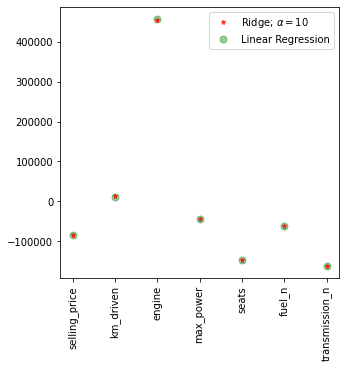

In [ ]:
plt.figure(figsize = (5, 5))
plt.plot(features,ridge.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
plt.plot(features,lr_n.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

plt.xticks(rotation = 90)
plt.legend()
plt.show()

determine best alpha lamda value for Ridge.

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
ridge_alpha = np.logspace(0,5,100)

In [ ]:
alpha_cv = RidgeCV(alphas = ridge_alpha, scoring = 'r2', cv =5)

Text(0.5, 1.0, 'Ridge non-logarithimic scale')

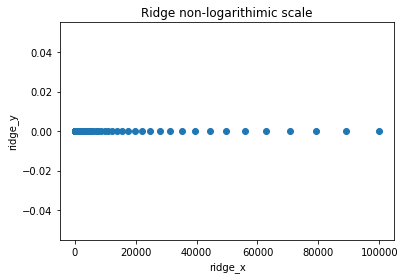

In [ ]:
ridgex = np.logspace(0,5, num=100)
ridgey = np.zeros(100)

plt.plot(ridgex,ridgey, 'o')
plt.xlabel('ridge_x')
plt.ylabel('ridge_y')
plt.title('Ridge non-logarithimic scale')

Text(0.5, 1.0, 'Ridge logarithimic scale')

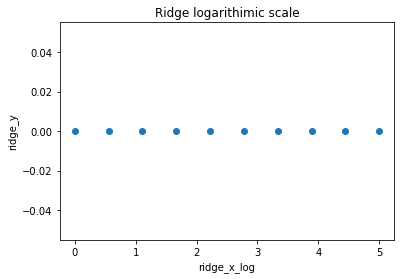

In [ ]:
ridgexlog = np.log10(np.logspace(0,5,num = 10))
ridgey = np.zeros(10)

plt.plot(ridgexlog, ridgey,'o')
plt.xlabel('ridge_x_log')
plt.ylabel('ridge_y')
plt.title('Ridge logarithimic scale')

In [ ]:
alpha_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [ ]:
print(f'the Trained Ridge model is {alpha_cv.score(Z_train,y_train)}')
print(f'the Test Ridge model is {alpha_cv.score(Z_test,y_test)}')

the Trained Ridge model is 0.6654130003401252
the Test Ridge model is 0.6688542729287815


In [ ]:
# finding optimum Ridge lambda value
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)
print(ridge_cv.score(X_train, y_train))
print(ridge_cv.score(X_test, y_test))

0.6654347746368288
0.669595819477251


LASSO REGRRESSION

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

In [ ]:
#recap

print(f'the OLS Trained score is {lr_n.score(Z_train,y_train)}')
print(f"the OLS Test score is {lr_n.score(Z_test,y_test)}")


print(f'the Trained Ridge model is {alpha_cv.score(Z_train,y_train)}')
print(f'the Test Ridge model is {alpha_cv.score(Z_test,y_test)}')

the OLS Trained score is 0.665437069432816
the OLS Test score is 0.6693417116567291
the Trained Ridge model is 0.6654130003401252
the Test Ridge model is 0.6688542729287815


In [ ]:
lasso_alphas = np.logspace(-4,1,100)

lasso_cv = LassoCV(alphas = lasso_alphas, cv =5, max_iter=500)

lasso_cv.fit(Z_train,y_train)

LassoCV(alphas=array([1.00000000e-04, 1.12332403e-04, 1.26185688e-04, 1.41747416e-04,
       1.59228279e-04, 1.78864953e-04, 2.00923300e-04, 2.25701972e-04,
       2.53536449e-04, 2.84803587e-04, 3.19926714e-04, 3.59381366e-04,
       4.03701726e-04, 4.53487851e-04, 5.09413801e-04, 5.72236766e-04,
       6.42807312e-04, 7.22080902e-04, 8.11130831e-04, 9.11162756e-04,
       1.02353102e-03, 1.14975700e-0...
       6.89261210e-01, 7.74263683e-01, 8.69749003e-01, 9.77009957e-01,
       1.09749877e+00, 1.23284674e+00, 1.38488637e+00, 1.55567614e+00,
       1.74752840e+00, 1.96304065e+00, 2.20513074e+00, 2.47707636e+00,
       2.78255940e+00, 3.12571585e+00, 3.51119173e+00, 3.94420606e+00,
       4.43062146e+00, 4.97702356e+00, 5.59081018e+00, 6.28029144e+00,
       7.05480231e+00, 7.92482898e+00, 8.90215085e+00, 1.00000000e+01]),
        cv=5, max_iter=500)

In [ ]:
# finding optimum lasso lambda 
#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(Z_train, y_train)


#score
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

0.6654370683994071
0.66934200523441


In [ ]:
print(f'{lasso_cv.score(Z_train,y_train)}')
print(f'{lasso_cv.score(Z_test, y_test)}')

0.6654370683994071
0.66934200523441


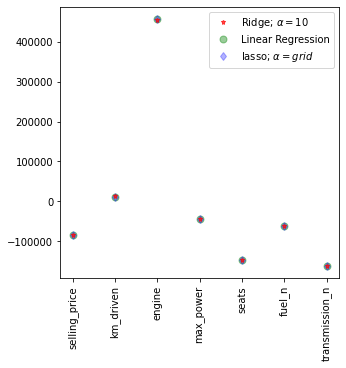

In [ ]:
plt.figure(figsize = (5, 5))
plt.plot(features,ridge.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
plt.plot(features,lr_n.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.plot(lasso_cv.coef_,alpha=0.3,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
print(" OLS ".center(18, "="))
print(f'the OLS Trained score is {lr_n.score(Z_train,y_train)}')
print(f"the OLS Test score is {lr_n.score(Z_test,y_test)}")

print(" Ridge ".center(18, "="))
print(f'the Trained Ridge model is {alpha_cv.score(Z_train,y_train)}')
print(f'the Test Ridge model is {alpha_cv.score(Z_test,y_test)}')
print(" Lasso ".center(18, "="))
print(f'the Trained Lasso model is {lasso_cv.score(Z_train,y_train)}')
print(f'the Test Lasso model is {lasso_cv.score(Z_test, y_test)}')

====== OLS =======
the OLS Trained score is 0.665437069432816
the OLS Test score is 0.6693417116567291
===== Ridge ======
the Trained Ridge model is 0.6654130003401252
the Test Ridge model is 0.6688542729287815
===== Lasso ======
the Trained Lasso model is 0.6654370683994071
the Test Lasso model is 0.66934200523441


KNN (To Test - Not Applicable to Project)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_df, y, test_size=0.3, random_state=42)

In [ ]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
cross_val_score(knn,Z_train,y_train,cv=7).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,


0.12612848432752735

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_train,y_train)

0.33881460065052404

In [ ]:
knn.score(X_test,y_test)

0.11504424778761062